In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
df = pd.read_csv("Fifa 23 Players Data.csv")

In [3]:
df.insert(0, 'player_id', range(1, len(df) + 1))

In [4]:
conn = sqlite3.connect("fifa23_dashboard/data/fifa23.db")

In [5]:
df.to_sql("players_fifa23", conn, if_exists="replace", index=False)

18539

In [6]:
pd.read_sql_query("PRAGMA table_info(players_fifa23)", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,player_id,INTEGER,0,None,0
1,1,Known As,TEXT,0,None,0
2,2,Full Name,TEXT,0,None,0
3,3,Overall,INTEGER,0,None,0
4,4,Potential,INTEGER,0,None,0
...,...,...,...,...,...,...
85,85,RWB Rating,INTEGER,0,None,0
86,86,LB Rating,INTEGER,0,None,0
87,87,CB Rating,INTEGER,0,None,0
88,88,RB Rating,INTEGER,0,None,0


In [7]:
query = """
SELECT *
FROM players_fifa23  
"""
general_status = pd.read_sql_query(query, conn)
general_status

,player_id,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,1,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,...,91,88,91,67,66,67,62,53,62,22
1,2,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,...,89,84,89,67,67,67,63,58,63,21
2,3,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,...,86,83,86,67,69,67,64,63,64,22
3,4,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,...,91,91,91,82,82,82,78,72,78,24
4,5,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,18535,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,...,50,44,50,41,38,41,40,36,40,15
18535,18536,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,...,45,45,45,47,48,47,49,49,49,15
18536,18537,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,...,52,49,52,46,44,46,46,42,46,17
18537,18538,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,...,33,33,33,44,42,44,47,49,47,15


In [8]:
unique_counts = general_status.nunique()
constant_columns = unique_counts[unique_counts == 1]
print(constant_columns)

Series([], dtype: int64)


In [9]:
general_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 90 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   player_id                    18539 non-null  int64 
 1   Known As                     18539 non-null  object
 2   Full Name                    18539 non-null  object
 3   Overall                      18539 non-null  int64 
 4   Potential                    18539 non-null  int64 
 5   Value(in Euro)               18539 non-null  int64 
 6   Positions Played             18539 non-null  object
 7   Best Position                18539 non-null  object
 8   Nationality                  18539 non-null  object
 9   Image Link                   18539 non-null  object
 10  Age                          18539 non-null  int64 
 11  Height(in cm)                18539 non-null  int64 
 12  Weight(in kg)                18539 non-null  int64 
 13  TotalStats                   18

In [10]:
general_status.describe()

,player_id,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,...,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,9270.000000,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,...,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,5351.892656,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,...,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,1.000000,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,...,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,4635.500000,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1470.000000,331.000000,1000.000000,...,54.000000,53.000000,54.000000,51.000000,48.000000,51.000000,49.000000,45.000000,49.000000,17.000000
50%,9270.000000,66.000000,71.000000,1.000000e+06,25.000000,182.000000,75.000000,1640.000000,358.000000,3000.000000,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,13904.500000,70.000000,75.000000,2.000000e+06,29.000000,186.000000,80.000000,1786.000000,385.000000,8000.000000,...,67.000000,66.000000,67.000000,66.000000,66.000000,66.000000,65.000000,66.000000,65.000000,20.000000
max,18539.000000,91.000000,95.000000,1.905000e+08,44.000000,206.000000,105.000000,2312.000000,502.000000,450000.000000,...,92.000000,91.000000,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000


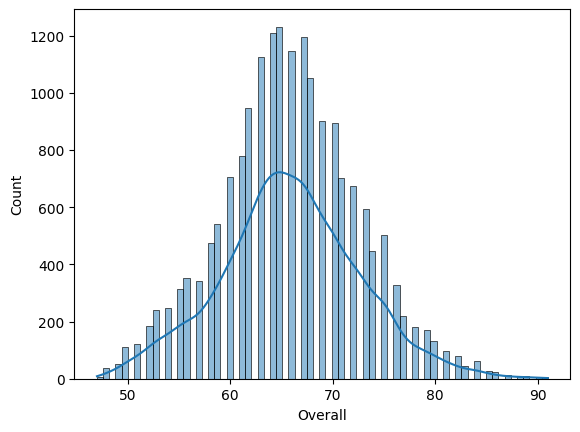

In [11]:
sns.histplot(df['Overall'], kde=True)
plt.show()

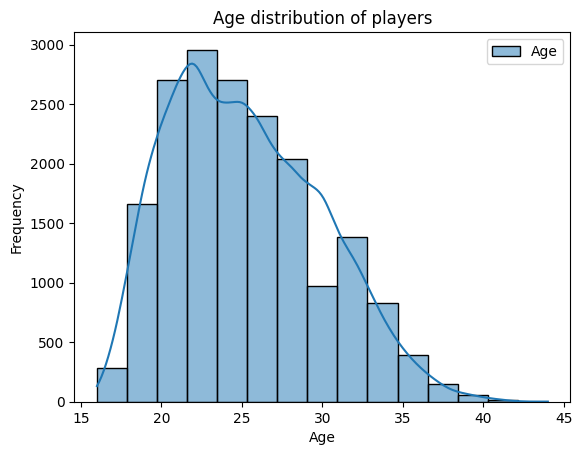

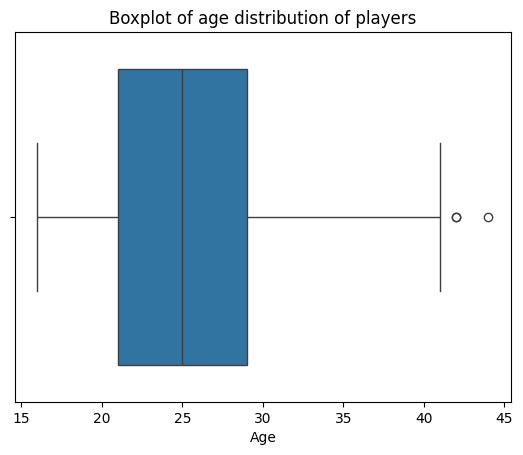

In [12]:
age_status = general_status[['Age']]
sns.histplot(age_status, kde=True, bins=15)
plt.title("Age distribution of players")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Boxplot - descobrir pq nao posso usar age_status
sns.boxplot(x=df['Age'])
plt.title("Boxplot of age distribution of players")
plt.show()

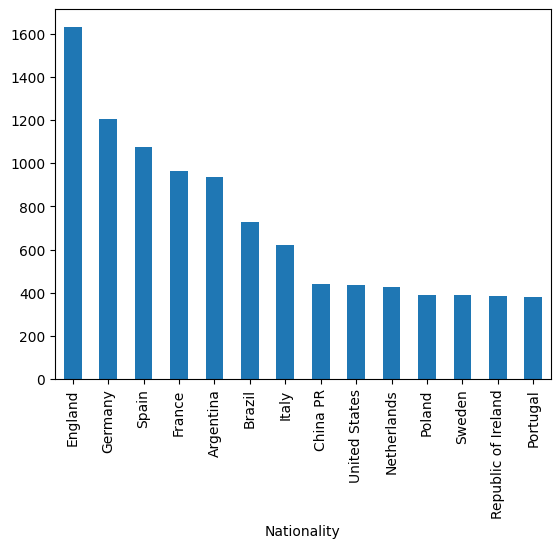

In [13]:
nationality_financial_status = general_status[['Nationality', 'player_id', 'Wage(in Euro)', 'Value(in Euro)']]
nationality_status = nationality_financial_status['Nationality']
top_10_just_nationality_status = nationality_status.value_counts().head(14).plot(kind='bar')
plt.show()

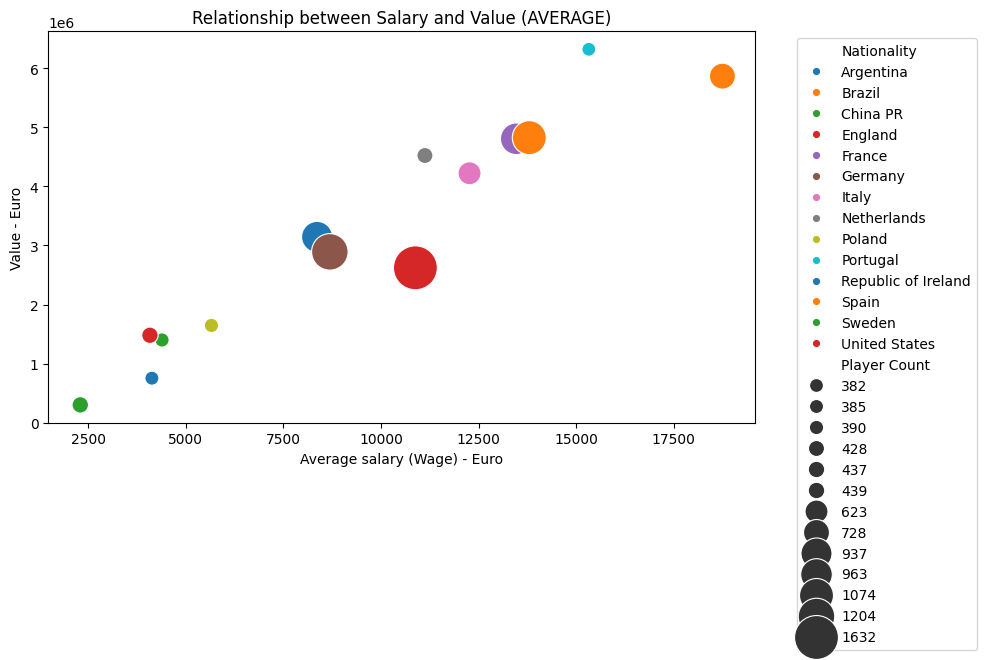

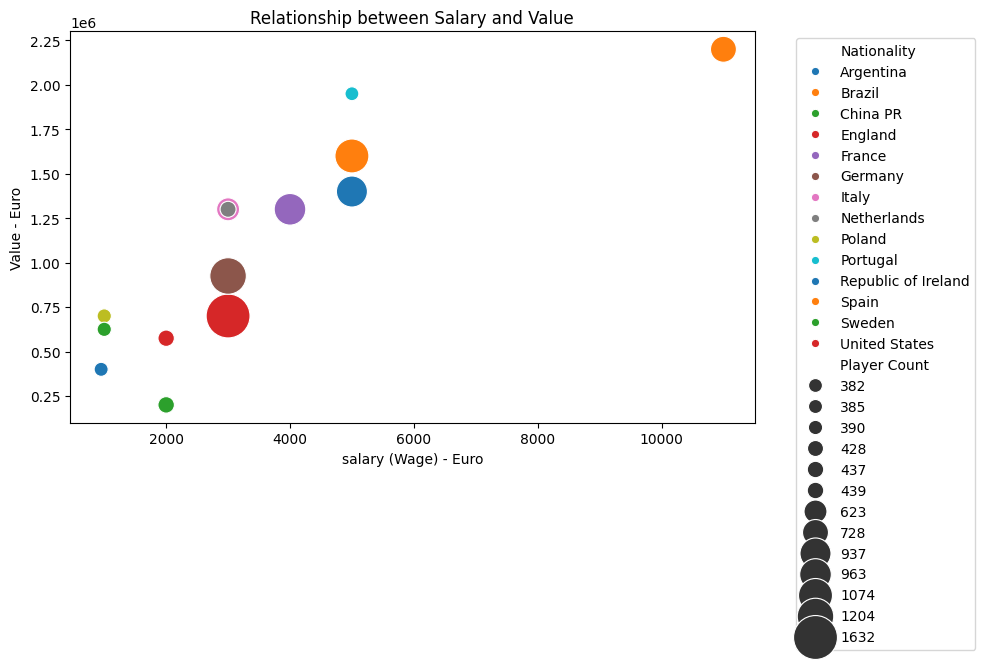

In [14]:
# Clear null values, if any
df = nationality_financial_status.dropna(subset=['Wage(in Euro)', 'Value(in Euro)'])

top_10_countries = nationality_financial_status['Nationality'].value_counts().head(14).index.tolist()

# 4. Filter to the countries
top10_nationality = df[general_status['Nationality'].isin(top_10_countries)]


grouped_mean = top10_nationality.groupby('Nationality').agg({
    'Wage(in Euro)': 'mean',
    'Value(in Euro)': 'mean',
    'player_id': 'count'
}).rename(columns={'player_id': 'Player Count'}).reset_index()

grouped_median = top10_nationality.groupby('Nationality').agg({
    'Wage(in Euro)': 'median',
    'Value(in Euro)': 'median',
    'player_id': 'count'
}).rename(columns={'player_id': 'Player Count'}).reset_index()


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=grouped_mean,
    x='Wage(in Euro)', 
    y='Value(in Euro)', 
    size='Player Count', 
    hue='Nationality',
    legend='full',
    palette='tab10',
    sizes=(100, 1000)
)
plt.title('Relationship between Salary and Value (AVERAGE)')
plt.xlabel('Average salary (Wage) - Euro')
plt.ylabel('Value - Euro')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=grouped_median,
    x='Wage(in Euro)', 
    y='Value(in Euro)', 
    size='Player Count', 
    hue='Nationality',
    legend='full',
    palette='tab10',
    sizes=(100, 1000)
)
plt.title('Relationship between Salary and Value')
plt.xlabel('salary (Wage) - Euro')
plt.ylabel('Value - Euro')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [15]:
query = """
SELECT Nationality, "Value(in Euro)", Overall, Potential
FROM players_fifa23
WHERE 
    Overall >= 70 AND Overall IS NOT NULL
    AND "Value(in Euro)" IS NOT NULL
"""
df_players_profitability = pd.read_sql_query(query, conn)

In [16]:
df_players_profitability["Value_per_Overall"] = df_players_profitability["Value(in Euro)"] / df_players_profitability["Overall"]
df_players_profitability["Value_per_Potential"] = df_players_profitability["Value(in Euro)"] / df_players_profitability["Potential"]

In [17]:
nationality_stats = df_players_profitability.groupby("Nationality").agg({
    "Value_per_Overall": ["mean", "median"],
    "Value_per_Potential": ["mean", "median"],
    "Nationality": "count"  
}).rename(columns={"Nationality": "Player_Count"})

nationality_stats.columns = ['Mean_Overall', 'Median_Overall', 'Mean_Potential', 'Median_Potential', 'Player_Count']
nationality_stats = nationality_stats.reset_index()
nationality_stats

,Nationality,Mean_Overall,Median_Overall,Mean_Potential,Median_Potential,Player_Count
0,Albania,88331.295211,71527.777778,82741.353434,66071.428571,18
1,Algeria,112219.746891,59459.459459,109968.588460,58666.666667,29
2,Angola,51569.679572,34709.627629,51210.939665,34024.435394,10
3,Argentina,76798.607727,38356.164384,74137.779773,37974.683544,383
4,Armenia,151272.209342,197530.864198,151272.209342,197530.864198,3
...,...,...,...,...,...,...
118,Uzbekistan,50000.000000,33333.333333,49208.924137,33333.333333,3
119,Venezuela,64917.842330,48315.438726,62161.943653,46690.921691,14
120,Wales,77886.186392,48904.761905,74761.548031,45623.120615,28
121,Zambia,108608.292608,96553.002224,101373.117378,90062.623599,4


In [18]:
filtered_stats = nationality_stats[nationality_stats["Player_Count"] >= 100]
filtered_stats

,Nationality,Mean_Overall,Median_Overall,Mean_Potential,Median_Potential,Player_Count
3,Argentina,76798.607727,38356.164384,74137.779773,37974.683544,383
7,Belgium,126340.742533,60960.960961,122463.628281,59725.745086,106
11,Brazil,104574.504753,47297.297297,101898.667255,46543.485186,484
21,Colombia,63128.168793,34228.550829,61533.885010,32663.584637,118
36,England,136988.850420,61218.067382,130682.442613,57692.307692,306
40,France,141132.508603,64000.000000,134853.497760,60493.827160,359
44,Germany,117568.451354,48648.648649,114196.669718,45783.132530,285
57,Italy,115796.794896,47220.077220,111535.248953,43794.871795,246
79,Netherlands,144019.929175,66216.216216,137427.974691,63157.894737,143
90,Portugal,152296.140623,70906.432749,145730.145579,65333.333333,176


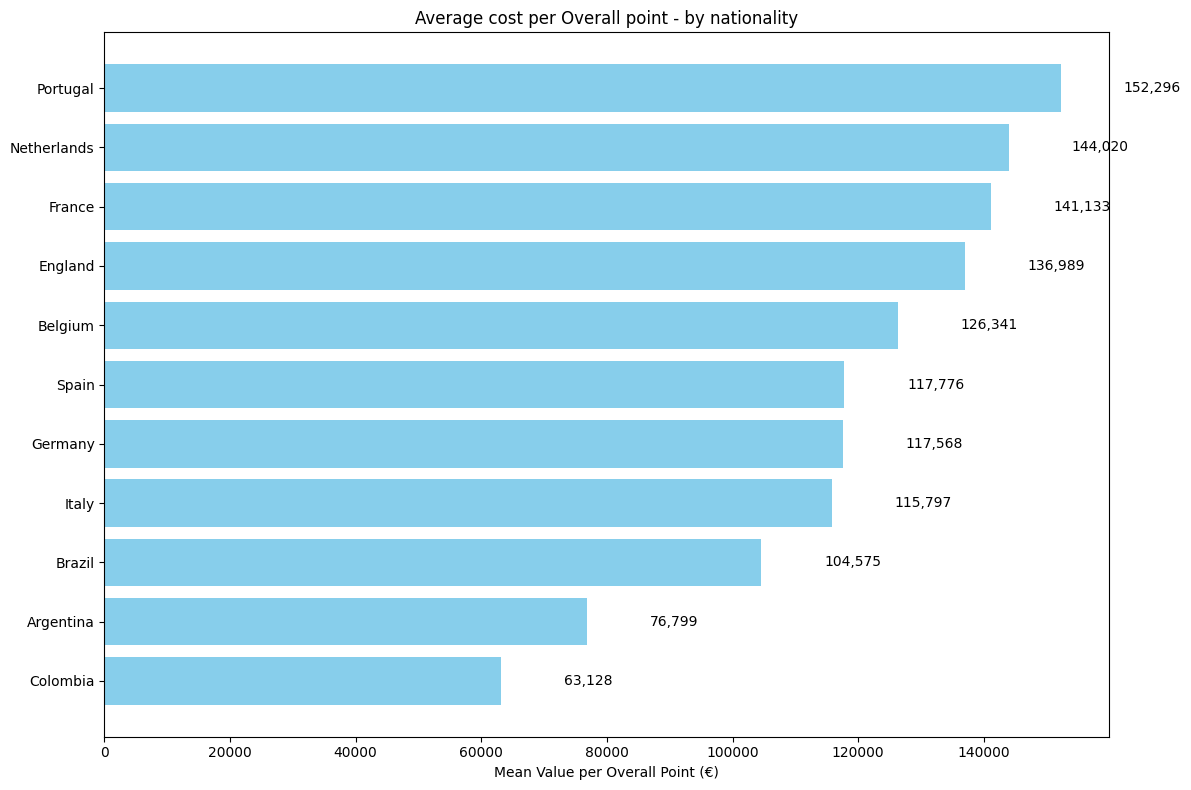

In [19]:
top_overall_value = filtered_stats.sort_values("Mean_Overall", ascending=False).head(20)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_overall_value["Nationality"], top_overall_value["Mean_Overall"], color='skyblue')
plt.xlabel("Mean Value per Overall Point (€)")
plt.title("Average cost per Overall point - by nationality")

# Adicionar valores no final das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10000, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', va='center')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

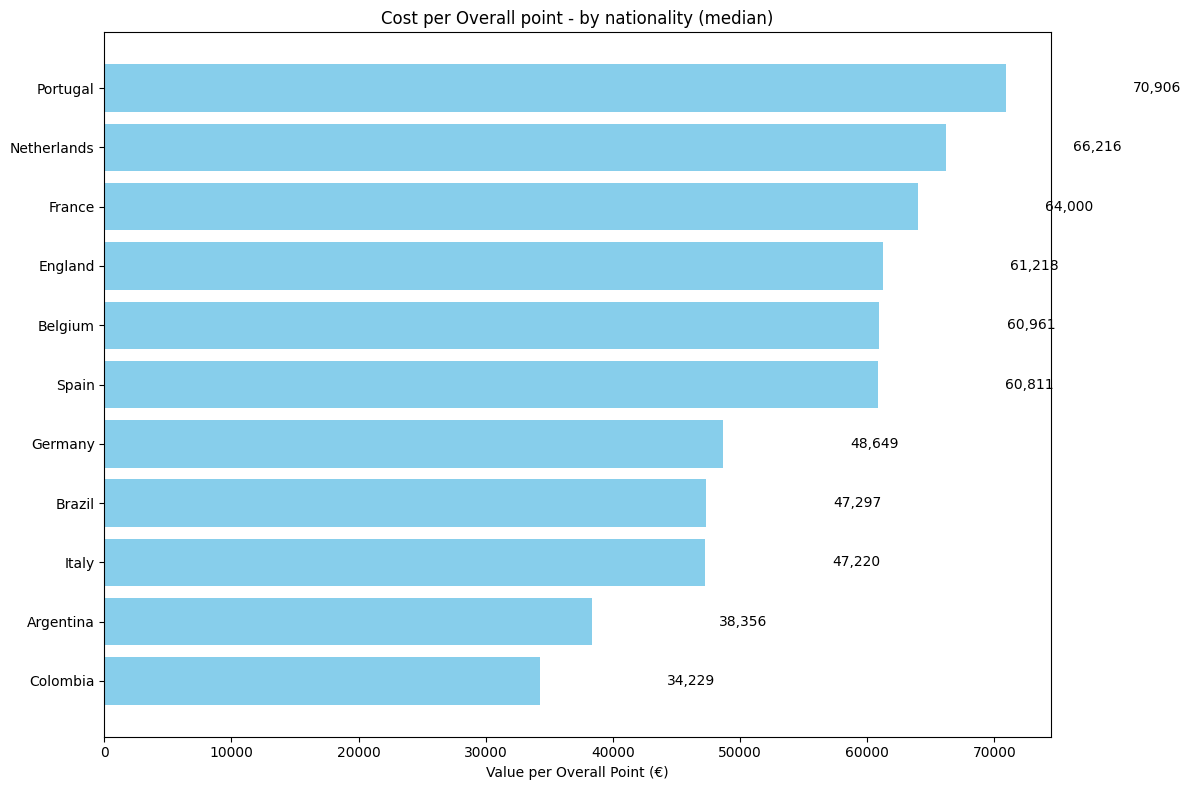

In [20]:
top_overall_value = filtered_stats.sort_values("Median_Overall", ascending=False).head(20)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_overall_value["Nationality"], top_overall_value["Median_Overall"], color='skyblue')
plt.xlabel("Value per Overall Point (€)")
plt.title("Cost per Overall point - by nationality (median)")

# Adicionar valores no final das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10000, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', va='center')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

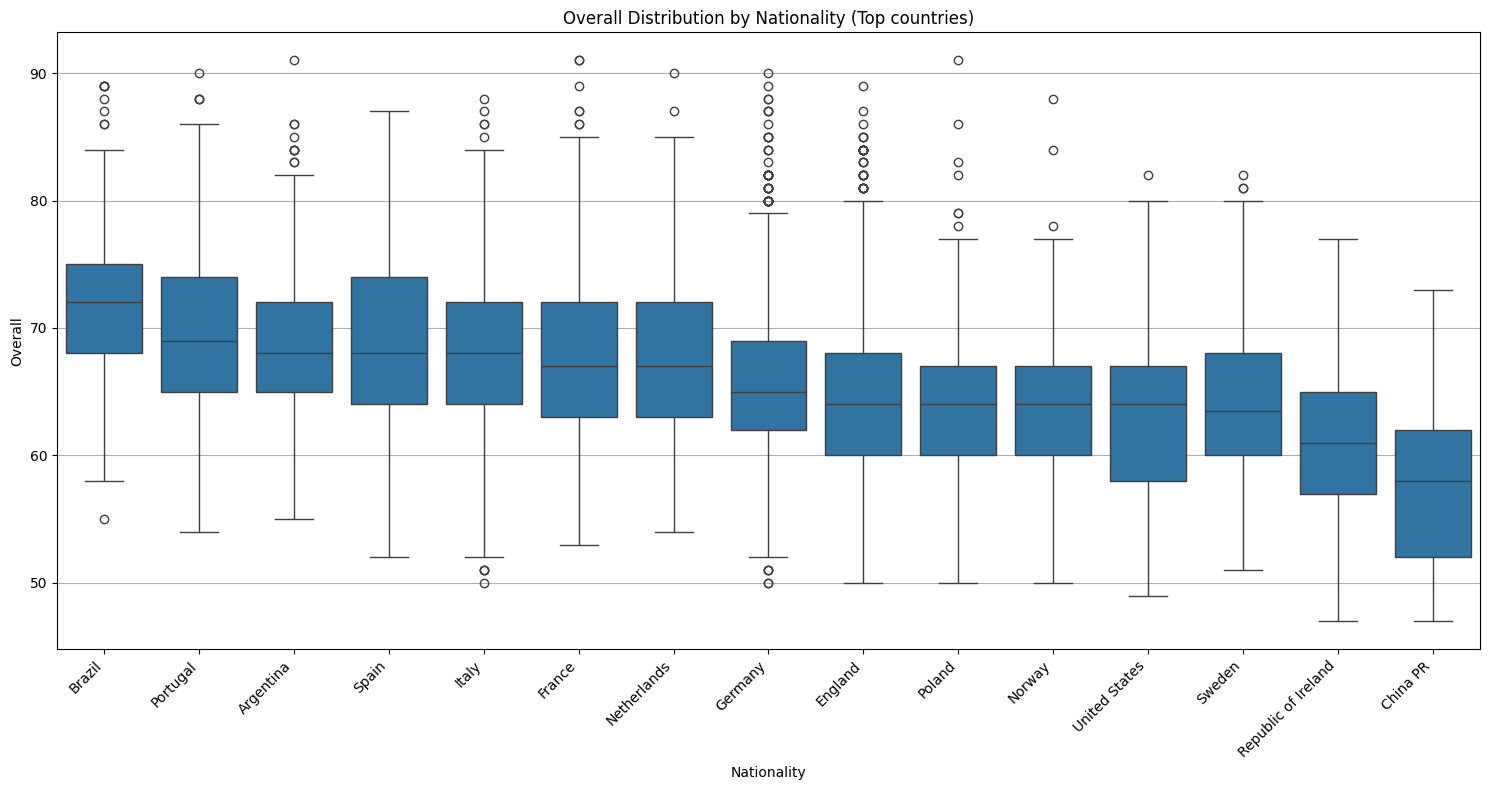

In [21]:


query = """
SELECT Nationality, Overall
FROM players_fifa23
WHERE Overall IS NOT NULL
"""

df_box = pd.read_sql_query(query, conn)


top_nationalities = df_box['Nationality'].value_counts()
top_nationalities = top_nationalities[top_nationalities > 350].index.tolist()

df_filtered = df_box[df_box['Nationality'].isin(top_nationalities)]


median_order = df_filtered.groupby("Nationality")["Overall"].median().sort_values(ascending=False).index


plt.figure(figsize=(15, 8))
sns.boxplot(x="Nationality", y="Overall", data=df_filtered, order=median_order)
plt.xticks(rotation=45, ha='right')
plt.title("Overall Distribution by Nationality (Top countries)")
plt.xlabel("Nationality")
plt.ylabel("Overall")
plt.tight_layout()
plt.grid(axis="y")
plt.show()

In [22]:

top_countries = df_players_profitability['Nationality'].value_counts().head(15).index


df_top = df_players_profitability[df_players_profitability['Nationality'].isin(top_countries)]



print("Normality Test (Shapiro-Wilk) - Overall:")
for country in top_countries:
    values = df_top[df_top['Nationality'] == country]['Overall']
    stat, p = stats.shapiro(values.sample(500, random_state=1)) if len(values) > 500 else stats.shapiro(values)
    print(f"{country}: p = {p:.25f} {'(Normal)' if p > 0.05 else '(Not normal)'}")


samples = [df_top[df_top['Nationality'] == c]['Overall'] for c in top_countries]
stat, p = stats.levene(*samples)
print(f"\nLevene: p = {p:.25f} {'(same variances)' if p > 0.05 else '(differents variances)'}")


Normality Test (Shapiro-Wilk) - Overall:
Spain: p = 0.0000000000000049528063452 (Not normal)
Brazil: p = 0.0000000000000000160740111 (Not normal)
Argentina: p = 0.0000000000000000024880010 (Not normal)
France: p = 0.0000000000000953870027730 (Not normal)
England: p = 0.0000000000001958930987091 (Not normal)
Germany: p = 0.0000000000000014439255548 (Not normal)
Italy: p = 0.0000000000005133488351645 (Not normal)
Portugal: p = 0.0000000025269743852849517 (Not normal)
Netherlands: p = 0.0000001071123580761760700 (Not normal)
Colombia: p = 0.0000000002079345082629131 (Not normal)
Belgium: p = 0.0000000203439467792009700 (Not normal)
Denmark: p = 0.0000004706590328740713404 (Not normal)
Uruguay: p = 0.0000006419371787250738845 (Not normal)
Czech Republic: p = 0.0000082624897576023150609 (Not normal)
Croatia: p = 0.0000035849449518094614033 (Not normal)

Levene: p = 0.0001529400920678987516477 (differents variances)


In [23]:
# Kruskal-Wallis
stat, p = stats.kruskal(*samples)
print(f"Kruskal-Wallis: H = {stat:.4f}, p = {p:.45f}")

if p < 0.05:
    print("→ We reject H₀: nationality affects Overall.")
else:
    print("→ We do not reject H₀: nationality does not affect Overall.")

Kruskal-Wallis: H = 68.7225, p = 0.000000003285067386628419541846512672792629539
→ We reject H₀: nationality affects Overall.


In [24]:
samples_value = [df_top[df_top['Nationality'] == c]["Value(in Euro)"] for c in top_countries]


print("Normality Test (Shapiro-Wilk) - Value(in Euro):")
for country in top_countries:
    values = df_top[df_top['Nationality'] == country]["Value(in Euro)"]
    stat, p = stats.shapiro(values.sample(500, random_state=1)) if len(values) > 500 else stats.shapiro(values)
    print(f"{country}: p = {p:.35f} {'(Normal)' if p > 0.05 else '(Not normal)'}")


stat, p = stats.levene(*samples_value)
print(f"\nLevene: p = {p:.20f} {'(same variances)' if p > 0.05 else '(different variances)'}")


Normality Test (Shapiro-Wilk) - Value(in Euro):
Spain: p = 0.00000000000000000000000000000275776 (Not normal)
Brazil: p = 0.00000000000000000000000000000000048 (Not normal)
Argentina: p = 0.00000000000000000000000000000098140 (Not normal)
France: p = 0.00000000000000000000000000008778736 (Not normal)
England: p = 0.00000000000000000000000004987216871 (Not normal)
Germany: p = 0.00000000000000000000000002354315654 (Not normal)
Italy: p = 0.00000000000000000000000322923967226 (Not normal)
Portugal: p = 0.00000000000000000017332523185525798 (Not normal)
Netherlands: p = 0.00000000000000000390533417523172120 (Not normal)
Colombia: p = 0.00000000000000000817594750006598436 (Not normal)
Belgium: p = 0.00000000000000006037997952260584534 (Not normal)
Denmark: p = 0.00000000000086589600430103049624241 (Not normal)
Uruguay: p = 0.00000000000002116885883599914362640 (Not normal)
Czech Republic: p = 0.00000000000004029991588948653699700 (Not normal)
Croatia: p = 0.00000000003732873714085960728272

In [25]:

kruskal = stats.kruskal(*samples_value)
print(f"\nKruskal-Wallis (Value): H = {kruskal.statistic:.4f}, p = {kruskal.pvalue:.40f}")

if kruskal.pvalue < 0.05:
    print("→ We reject H₀: nationality affects player value.")
else:
    print("→ We do not reject H₀: nationality does not affect the value of the players.")


Kruskal-Wallis (Value): H = 119.7175, p = 0.0000000000000000007146844224628583486099
→ We reject H₀: nationality affects player value.
